In [319]:
### 參考 
### https://zhuanlan.zhihu.com/p/59887525
### https://blog.csdn.net/lll1528238733/article/details/75114360
### https://zhuanlan.zhihu.com/p/32314696
from sklearn.cluster import KMeans
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot  as  plt
import pandas as pd

import seaborn as sns
%matplotlib inline

In [320]:
df2015 = pd.read_csv("2015.csv")
df2016 = pd.read_csv("2016.csv")
df2017 = pd.read_csv("2017.csv")

In [321]:
df2015.info()
print("--------------------------------------------------------")
df2016.info()
print("--------------------------------------------------------")
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                   

In [322]:
df2015.describe()
print("--------------------------------------------------------")
df2016.describe()
print("--------------------------------------------------------")
df2017.describe()

--------------------------------------------------------
--------------------------------------------------------


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


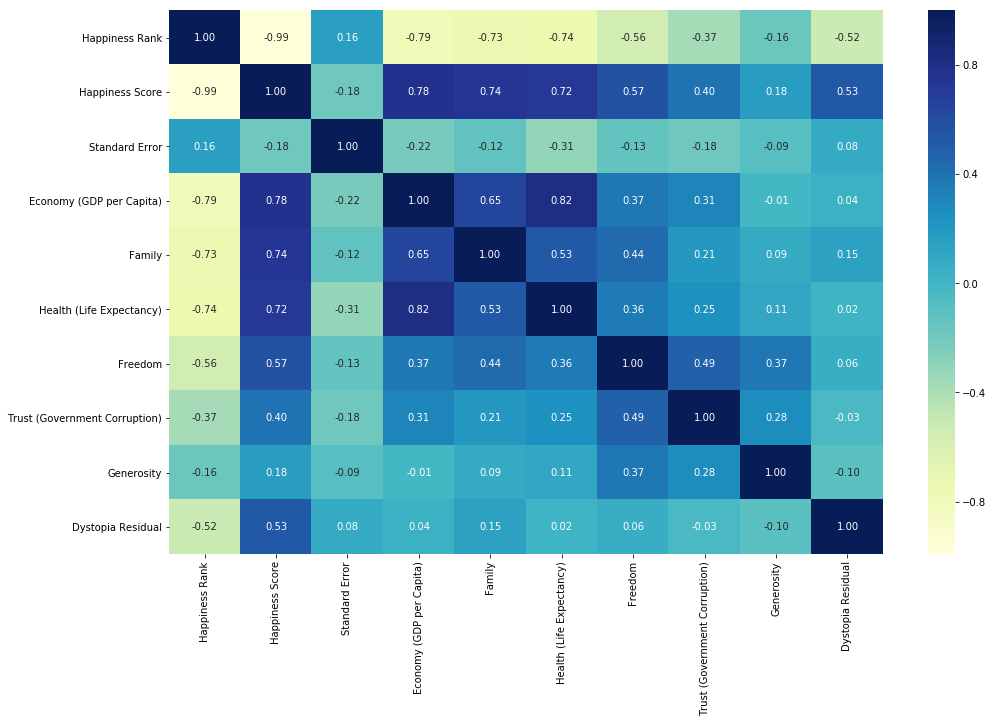

In [323]:
corrdf2015 = df2015.corr()#相關係數
plt.figure(figsize=(16,10))
sns.heatmap(corrdf2015,annot=True,cmap="YlGnBu",fmt=".2f");
plt.show()

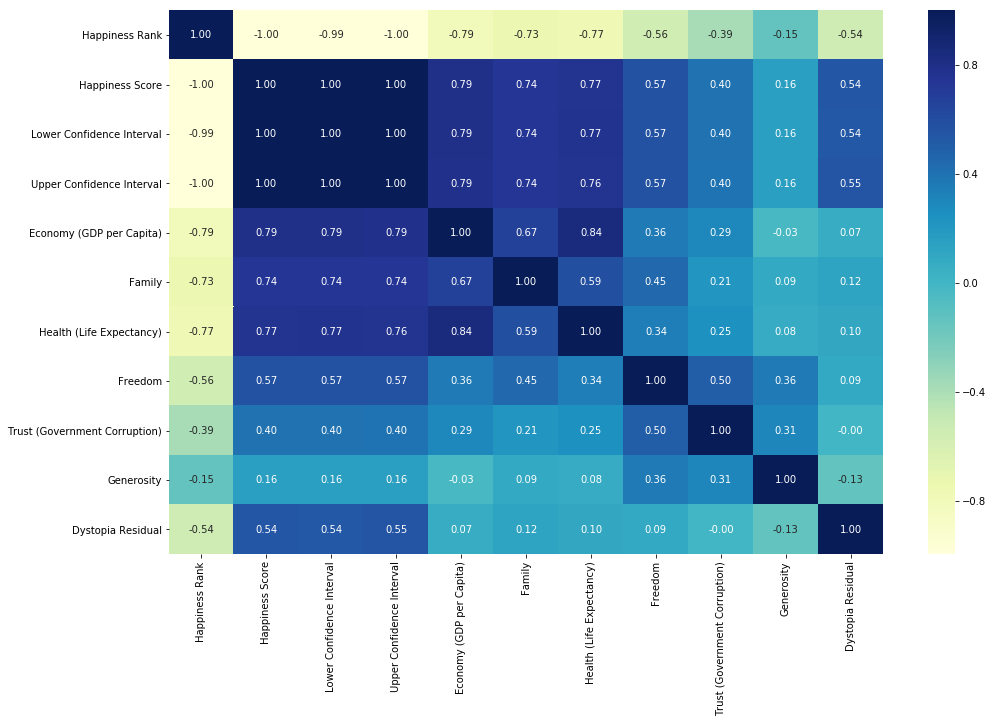

In [324]:
corrdf2016 = df2016.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corrdf2016,annot=True,cmap="YlGnBu",fmt=".2f");
plt.show()

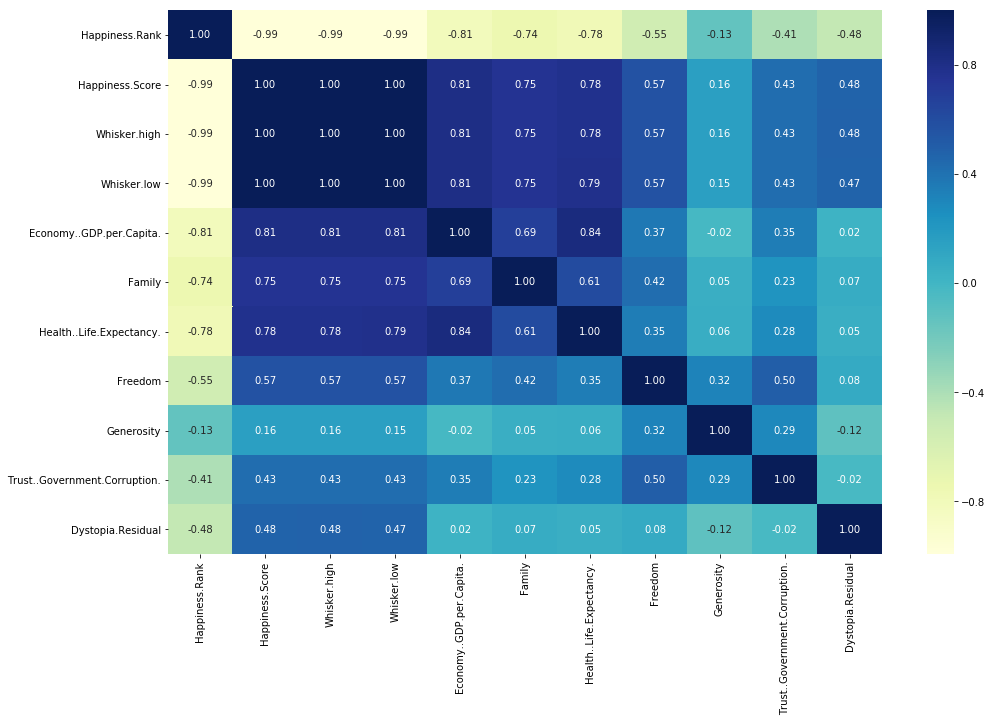

In [325]:
corrdf2017 = df2017.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corrdf2017,annot=True,cmap="YlGnBu",fmt=".2f");
plt.show()

In [326]:
corrdf2015["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [327]:
corrdf2016["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Lower Confidence Interval        0.999485
Upper Confidence Interval        0.999474
Economy (GDP per Capita)         0.790322
Health (Life Expectancy)         0.765384
Family                           0.739252
Freedom                          0.566827
Dystopia Residual                0.543738
Trust (Government Corruption)    0.402032
Generosity                       0.156848
Happiness Rank                  -0.995743
Name: Happiness Score, dtype: float64

In [328]:
corrdf2017["Happiness.Score"].sort_values(ascending=False)

Happiness.Score                  1.000000
Whisker.low                      0.999520
Whisker.high                     0.999497
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Happiness.Rank                  -0.992774
Name: Happiness.Score, dtype: float64

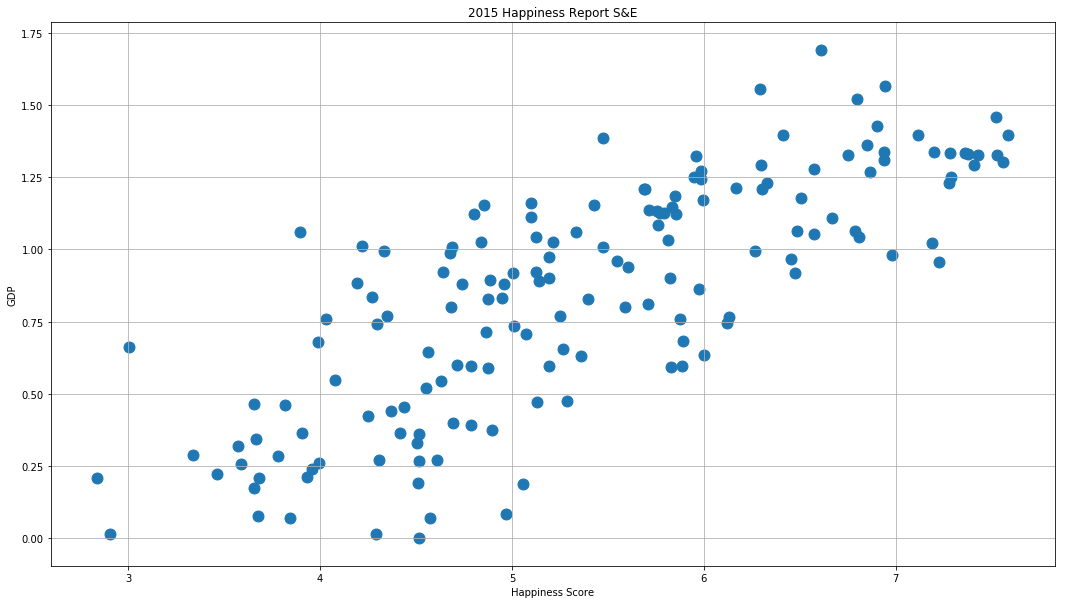

In [329]:
plt.figure(figsize=(18,10))
plt.title('2015 Happiness Report S&E')
plt.xlabel('Happiness Score')
plt.ylabel('GDP')
plt.grid(True)
plt.scatter(df2015["Happiness Score"],df2015["Economy (GDP per Capita)"],s=120)

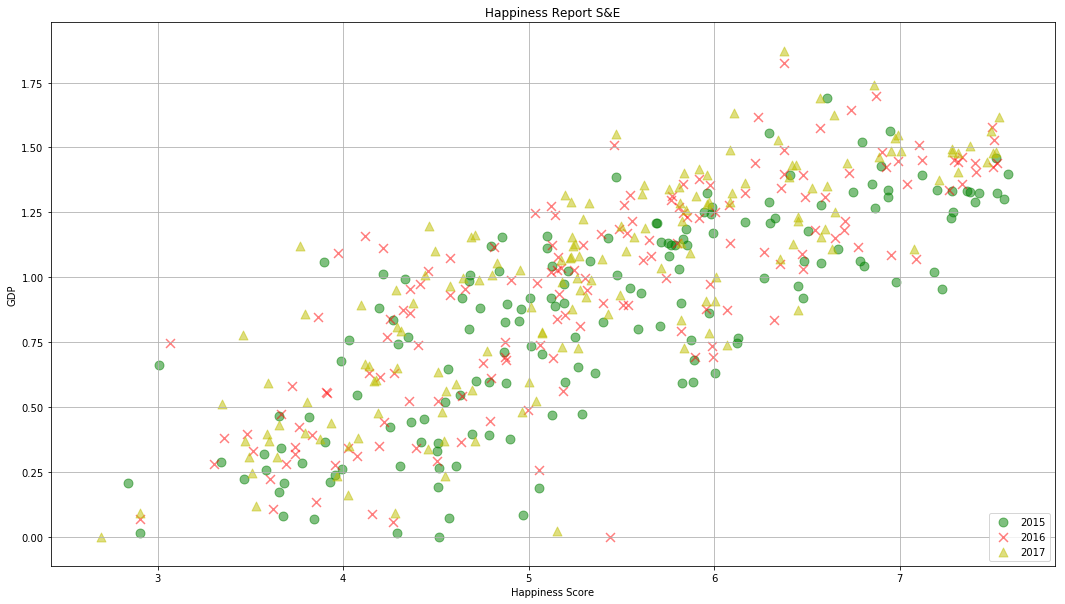

In [330]:
plt.figure(figsize=(18,10))
plt.title('Happiness Report S&E')
plt.xlabel('Happiness Score')
plt.ylabel('GDP')
plt.grid(True)
plt.scatter(df2015["Happiness Score"],df2015["Economy (GDP per Capita)"],s=80,c="g",label="2015",alpha=0.5)
plt.scatter(df2016["Happiness Score"],df2016["Economy (GDP per Capita)"],s=80,marker="x",c="r",label="2016",alpha=0.5)
plt.scatter(df2017["Happiness.Score"],df2017["Economy..GDP.per.Capita."],s=80,marker="^",c="y",label="2017",alpha=0.5)
plt.legend(loc='lower right')

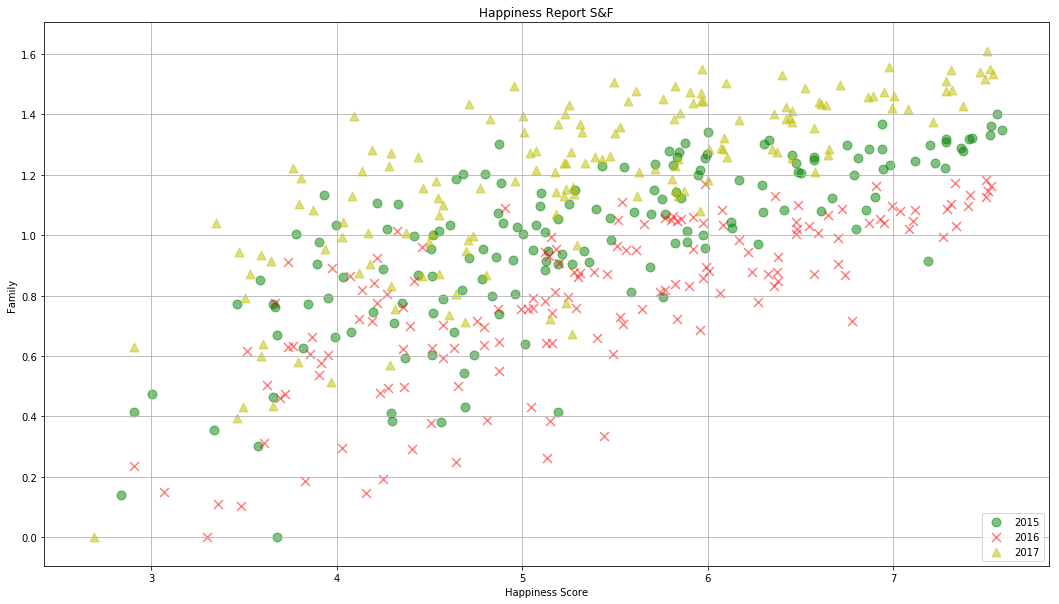

In [331]:
plt.figure(figsize=(18,10))
plt.title('Happiness Report S&F')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.grid(True)
plt.scatter(df2015["Happiness Score"],df2015["Family"],s=80,c="g",label="2015",alpha=0.5)
plt.scatter(df2016["Happiness Score"],df2016["Family"],s=80,marker="x",c="r",label="2016",alpha=0.5)
plt.scatter(df2017["Happiness.Score"],df2017["Family"],s=80,marker="^",c="y",label="2017",alpha=0.5)
plt.legend(loc='lower right')

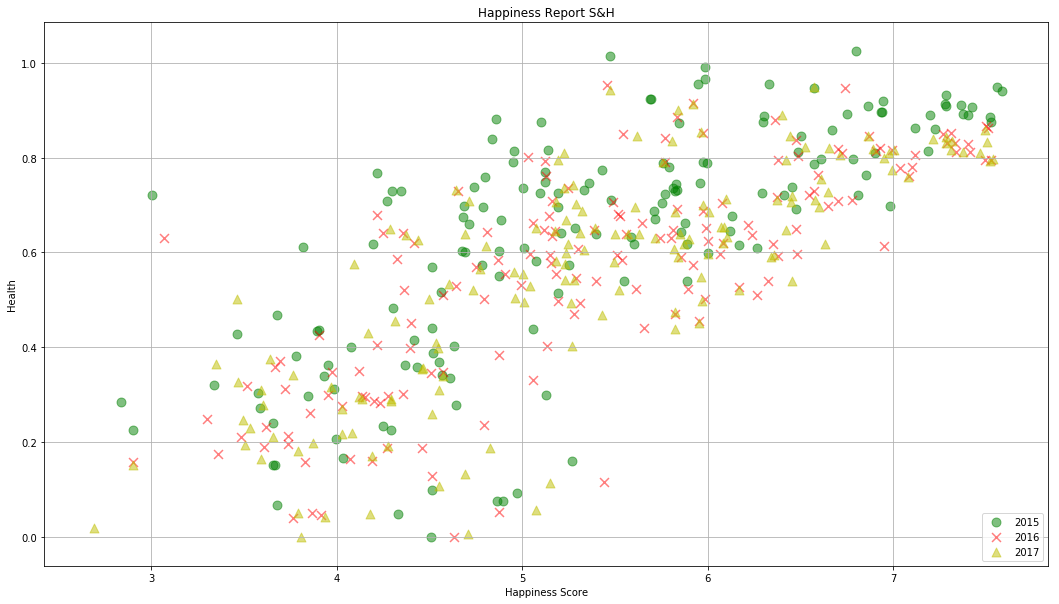

In [332]:
plt.figure(figsize=(18,10))
plt.title('Happiness Report S&H')
plt.xlabel('Happiness Score')
plt.ylabel('Health')
plt.grid(True)
plt.scatter(df2015["Happiness Score"],df2015["Health (Life Expectancy)"],s=80,c="g",label="2015",alpha=0.5)
plt.scatter(df2016["Happiness Score"],df2016["Health (Life Expectancy)"],s=80,marker="x",c="r",label="2016",alpha=0.5)
plt.scatter(df2017["Happiness.Score"],df2017["Health..Life.Expectancy."],s=80,marker="^",c="y",label="2017",alpha=0.5)
plt.legend(loc='lower right')

In [333]:
region_temp = df2015.Region
region = set(region_temp)
region_color = {"Middle East and Northern Africa":"red",
                 "Latin America and Caribbean":"green",
                 "Eastern Asia":"magenta",
                 "Sub-Saharan Africa":"pink",
                 "Southeastern Asia":"cyan",
                 "Western Europe":"blue",
                 "North America":"olive",
                 "Australia and New Zealand":"orange",
                 "Central and Eastern Europe":"purple",
                 "Southern Asia":"yellow"}
colors = []
for i in df2015["Region"]:
    
    colors.append(region_color[i])

<Figure size 432x288 with 0 Axes>

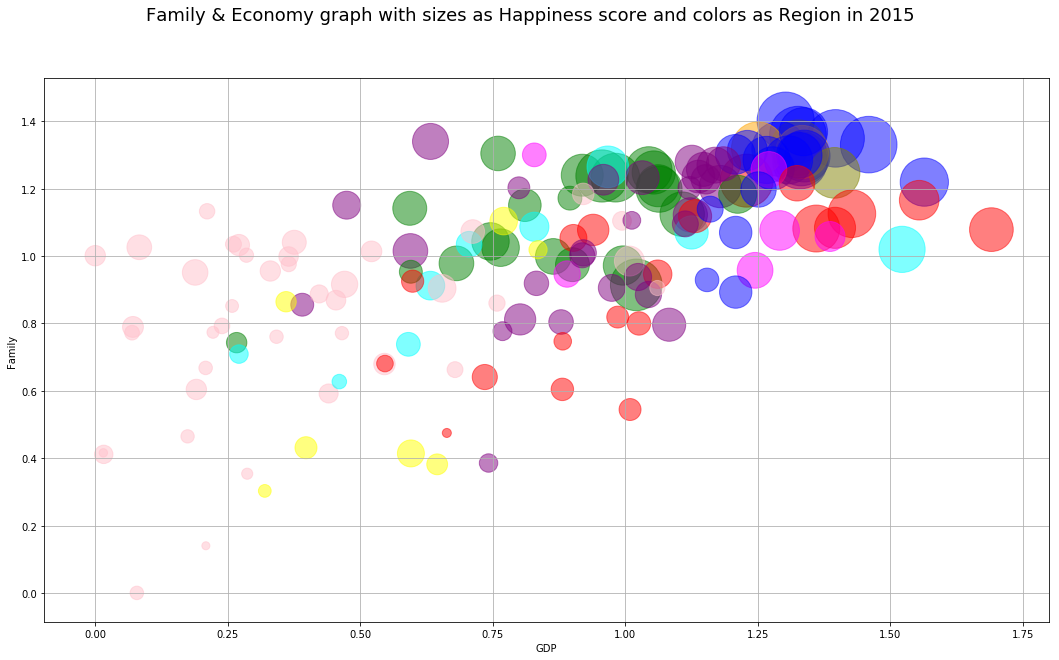

In [334]:
plt.clf()
plt.figure(figsize=(18,10))
plt.scatter(df2015["Economy (GDP per Capita)"], df2015["Family"], s=(df2015['Happiness Score']**4), alpha=0.5, c=colors)
plt.grid(True)
plt.xlabel("GDP")
plt.ylabel("Family")

plt.suptitle("Family & Economy graph with sizes as Happiness score and colors as Region in 2015", fontsize=18)

plt.show()

In [335]:
region_temp = df2016.Region
region = set(region_temp)
region_color = {"Middle East and Northern Africa":"red",
                 "Latin America and Caribbean":"green",
                 "Eastern Asia":"magenta",
                 "Sub-Saharan Africa":"pink",
                 "Southeastern Asia":"cyan",
                 "Western Europe":"blue",
                 "North America":"olive",
                 "Australia and New Zealand":"orange",
                 "Central and Eastern Europe":"purple",
                 "Southern Asia":"yellow"}
colors = []
for i in df2016["Region"]:
    
    colors.append(region_color[i])

<Figure size 432x288 with 0 Axes>

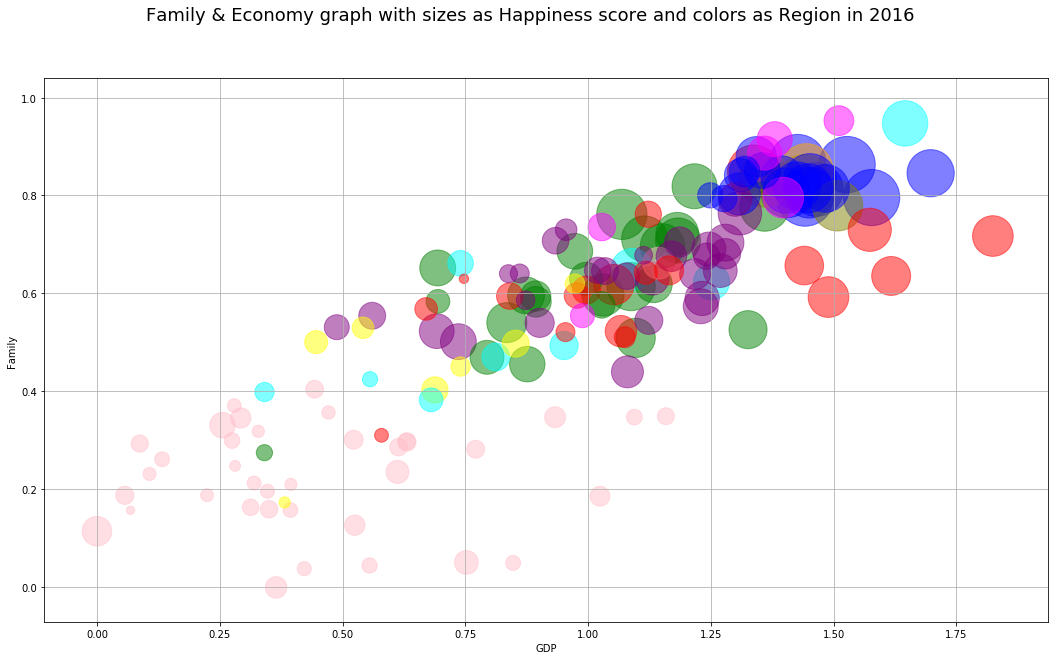

In [336]:
plt.clf()
plt.figure(figsize=(18,10))
plt.scatter(df2016["Economy (GDP per Capita)"], df2016["Health (Life Expectancy)"], s=(df2016['Happiness Score']**4), alpha=0.5, c=colors)
plt.grid(True)
plt.xlabel("GDP")
plt.ylabel("Family")

plt.suptitle("Family & Economy graph with sizes as Happiness score and colors as Region in 2016", fontsize=18)

plt.show()

In [337]:
from sklearn.linear_model import LinearRegression
X = DataFrame(df2016,columns=["Economy (GDP per Capita)","Health (Life Expectancy)","Family"])
Y = DataFrame(df2016[["Happiness Score"]])

lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_)
print(lm.intercept_ )

[[0.78608639 1.55728452 1.56233069]]
[2.52408279]


In [338]:
new_X = DataFrame(df2017,columns=["Economy..GDP.per.Capita.","Health..Life.Expectancy.","Family"])
Pred_X = new_X.iloc[0:len(new_X),:3]
Pred_X

,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Family
0,1.616463,0.796667,1.533524
1,1.482383,0.792566,1.551122
2,1.480633,0.833552,1.610574
3,1.564980,0.858131,1.516912
4,1.443572,0.809158,1.540247
5,1.503945,0.810696,1.428939
6,1.479204,0.834558,1.481349
7,1.405706,0.816760,1.548195
8,1.494387,0.830875,1.478162
9,1.484415,0.843887,1.510042


In [339]:
#Pred_X = np.reshape(Pred_X,(-1,1))
#predict_score = lm.predict([[1.616463,0.796667,1.533524]])
predict_score = lm.predict(Pred_X)
#print(predict_score)
p_score = pd.DataFrame(predict_score,columns = ["score"])
print (p_score)

        score
0    7.431270
1    7.346979
2    7.502315
3    7.460564
4    7.325318
5    7.201273
6    7.300866
7    7.319809
8    7.302087
9    7.364318
10   7.061106
11   6.792071
12   7.243685
13   7.163746
14   7.426815
15   7.238476
16   7.233359
17   7.486673
18   7.249434
19   6.791114
20   6.912912
21   6.590879
22   7.002495
23   6.788815
24   6.427991
25   7.448095
26   7.185409
27   6.807582
28   6.012498
29   6.738983
..        ...
125  4.814699
126  5.164238
127  4.487447
128  5.238494
129  5.392249
130  4.873924
131  6.302932
132  4.928001
133  4.765471
134  4.620942
135  3.999075
136  4.422696
137  4.818102
138  4.792973
139  5.001998
140  4.029716
141  5.846829
142  3.869957
143  4.775244
144  4.246305
145  4.933458
146  4.030414
147  4.338245
148  4.254820
149  3.823746
150  4.799792
151  4.533308
152  5.121457
153  3.816153
154  2.553317

[155 rows x 1 columns]


In [340]:
s_2017 =pd.DataFrame(df2017,columns=["Happiness.Rank","Happiness.Score"])
print(s_2017)

     Happiness.Rank  Happiness.Score
0                 1            7.537
1                 2            7.522
2                 3            7.504
3                 4            7.494
4                 5            7.469
5                 6            7.377
6                 7            7.316
7                 8            7.314
8                 9            7.284
9                10            7.284
10               11            7.213
11               12            7.079
12               13            7.006
13               14            6.993
14               15            6.977
15               16            6.951
16               17            6.891
17               18            6.863
18               19            6.714
19               20            6.652
20               21            6.648
21               22            6.635
22               23            6.609
23               24            6.599
24               25            6.578
25               26            6.572
2

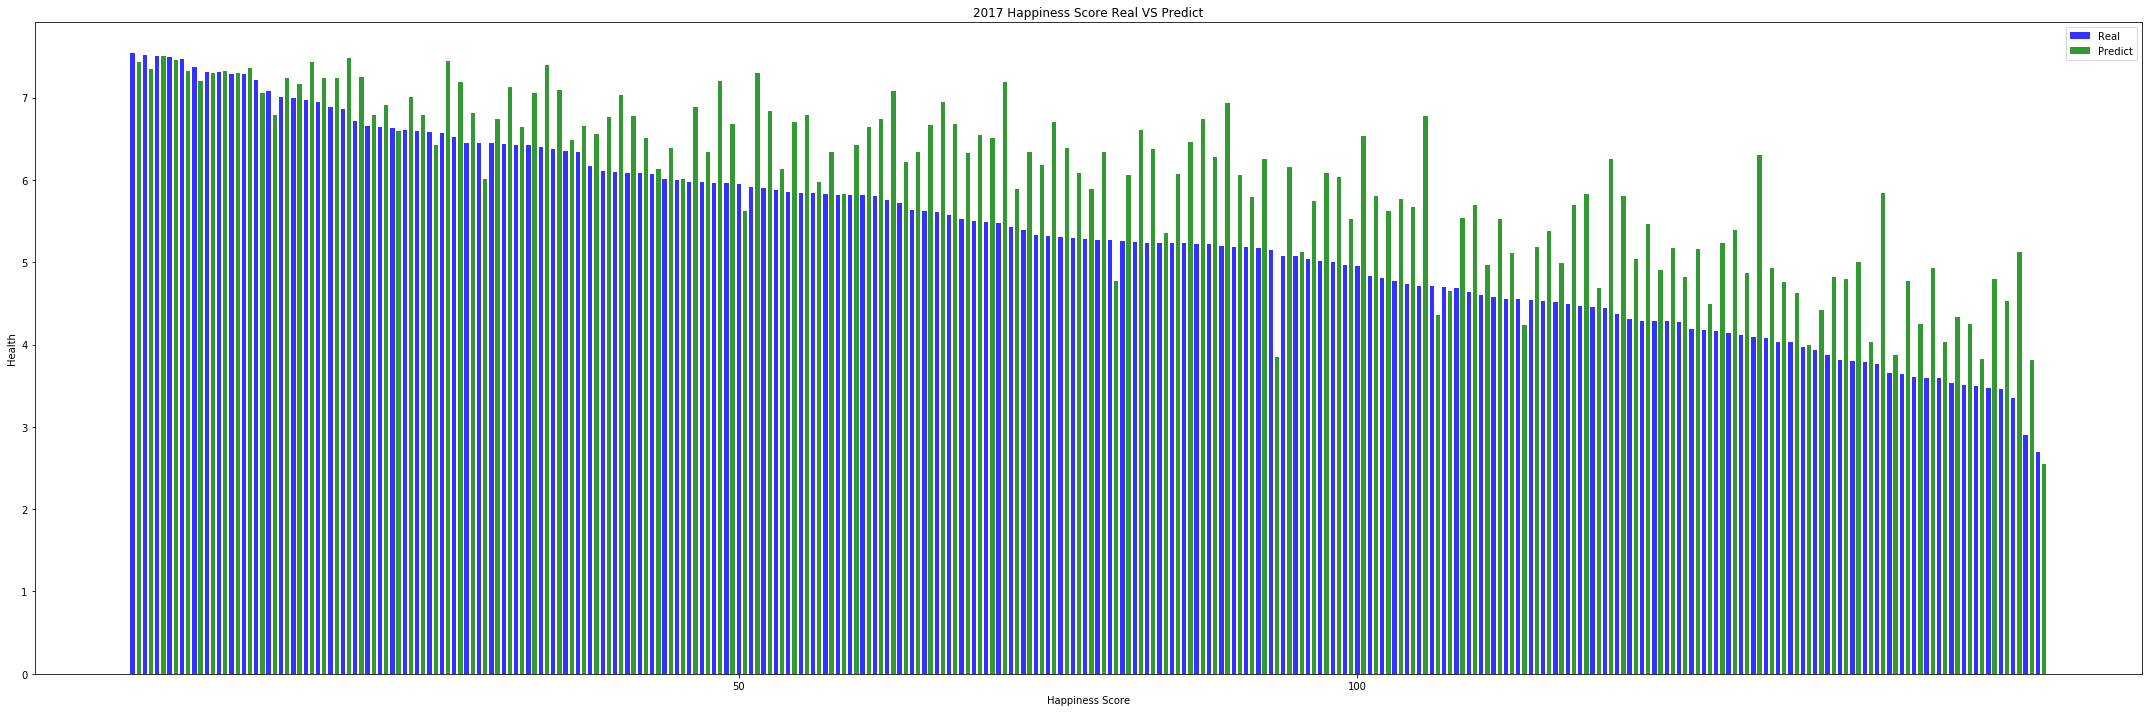

In [341]:
plt.figure(figsize=(30,10))
plt.title('2017 Happiness Score Real VS Predict')
plt.xlabel('Happiness Score')
plt.ylabel('Health')
plt.yticks(range(11))
plt.xticks(range(50,150,50))
rects1 = plt.bar(s_2017["Happiness.Rank"],s_2017["Happiness.Score"],0.35,alpha=0.8,color='b',label='Real')
rects2 = plt.bar(s_2017["Happiness.Rank"]+0.5 , p_score["score"],0.35,alpha=0.8,color='g',label='Predict')
plt.legend()

plt.tight_layout()
plt.show()

In [358]:
error = 0
s_2017 =df2017["Happiness.Score"]#,columns=["Happiness.Rank","Happiness.Score"])
#print(len(s_2017))
#print(s_2017[0])
#print(predict_score[0])
#e_2017 = s_2017.iloc[0:len(s_2017),1:]
#print(e_2017)
#print(len(e_2017))

for i in range(len(s_2017)):
    error+=(abs(s_2017[i]-predict_score[i])/s_2017[i])
#print(error)    
train_error_ridge=error/len(s_2017)*100
print(train_error_ridge[0],"%")

14.897880698598295 %
